In [18]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(file_name)


# Check missing values
df.isnull().sum()

# Convert categorical variables
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (2).csv


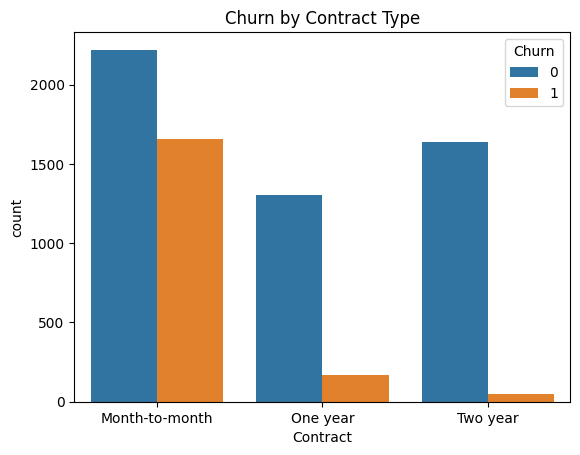

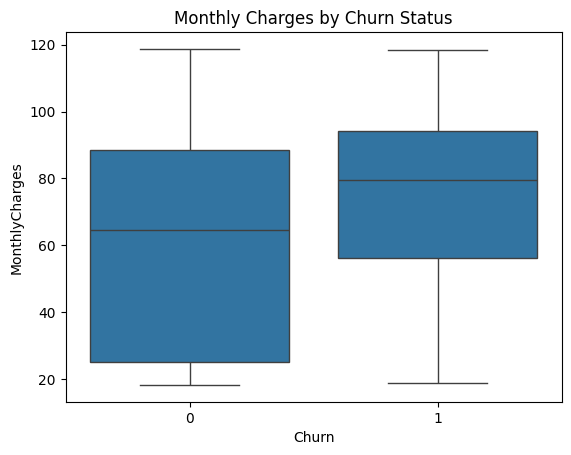

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn by contract type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

# Churn by MonthlyCharges
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.show()


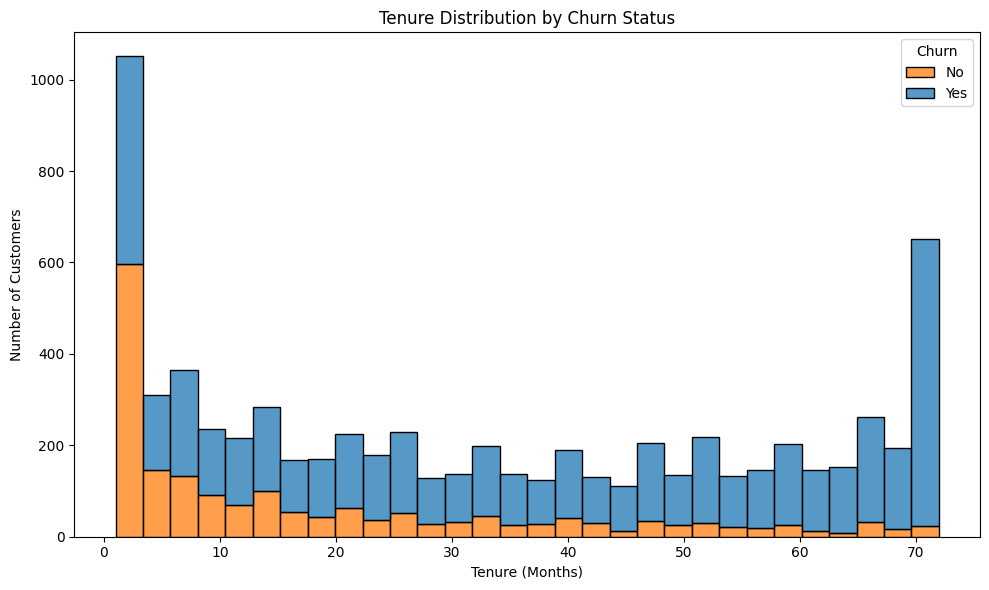

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Plot histogram of tenure separated by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()

# Create the 'outputs' directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

plt.savefig("outputs/tenure_distribution.png")
plt.show()

In [21]:
df['AvgMonthlyCharge'] = df['TotalCharges'] / df['tenure']
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
df = pd.get_dummies(df, drop_first=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[943  90]
 [213 161]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.43      0.52       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



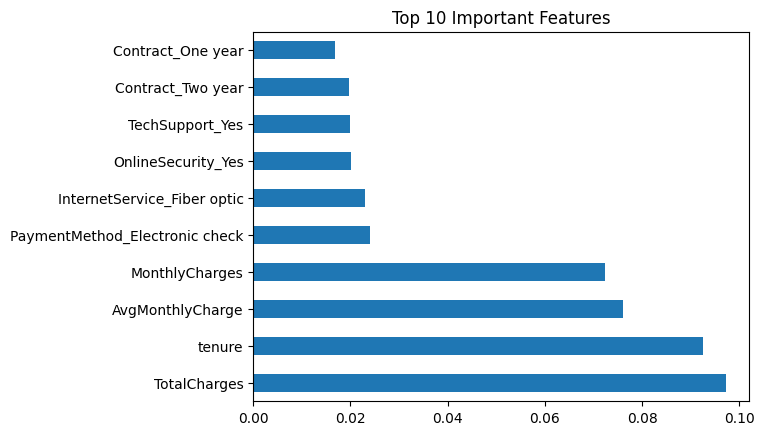

In [23]:
importances = model.feature_importances_
features = pd.Series(importances, index=X.columns)
features.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()